In [1]:
import pandas as pd

In [2]:
filepath="Desktop/email_table_result.csv"

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'Mail_status', 'Unnamed: 8'],
      dtype='object')

In [5]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,Mail_status,Unnamed: 8
0,85120,short_email,personalized,2,Sunday,US,5,Unread,Unread
1,966622,long_email,personalized,12,Sunday,UK,2,Link clicked,Link clicked
2,777221,long_email,personalized,11,Wednesday,US,2,Unread,Unread
3,493711,short_email,generic,6,Monday,UK,1,Unread,Unread
4,106887,long_email,generic,14,Monday,US,6,Unread,Unread


In [6]:
unique_values = df['Mail_status'].unique()
print(unique_values)

['Unread' 'Link clicked' 'Mail opened']


In [29]:
count_df=df.groupby(['user_country','Mail_status']).size().reset_index(name='count')
pivot_df = count_df.pivot(index='user_country', columns='Mail_status', values='count').fillna(0)
print(pivot_df)

Mail_status   Link clicked  Mail opened  Unread
user_country                                   
ES                      83          310    9574
FR                      80          332    9583
UK                     492         1915   17532
US                    1464         5719   52916


In [53]:
df_us = df[df['user_country'] == 'US']
pivot_table = df_us.pivot_table(
    index='hour',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
hour                                          
1                      32          145    1425
2                      46          181    1991
3                      70          208    2483
4                      63          288    3071
5                      82          287    3554
6                      91          393    3959
7                     101          398    4345
8                     100          411    4565
9                     145          565    4426
10                    163          583    4202
11                    136          521    3913
12                    117          448    3327
13                     82          347    2899
14                     63          284    2392
15                     59          189    1843
16                     49          173    1478
17                     29          122     984
18                     10           84     769
19                     10           34     504
20           

In [54]:
df_uk = df[df['user_country'] == 'UK']
pivot_table = df_uk.pivot_table(
    index='hour',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
hour                                          
1                      15           37     502
2                       9           68     657
3                      10           73     832
4                      22           96    1014
5                      26          103    1181
6                      28          119    1366
7                      39          148    1485
8                      46          127    1475
9                      59          220    1503
10                     47          205    1278
11                     46          167    1246
12                     37          141    1122
13                     24          111     975
14                     23           90     801
15                     23           70     596
16                     12           39     477
17                      6           37     325
18                     10           19     252
19                      4           14     160
20           

In [55]:
df_fr = df[df['user_country'] == 'FR']
pivot_table = df_fr.pivot_table(
    index='hour',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
hour                                          
1                       1            6     251
2                       4           10     354
3                       8            9     452
4                       2           11     537
5                       7           20     657
6                       6           22     725
7                       4           26     806
8                       4           19     784
9                       8           33     774
10                      6           38     800
11                     12           30     692
12                      4           27     664
13                      3           25     561
14                      5           15     452
15                      3           14     330
16                      1           11     237
17                      0            7     183
18                      1            5     122
19                      0            1      73
20           

In [56]:
df_es = df[df['user_country'] == 'ES']
pivot_table = df_es.pivot_table(
    index='hour',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
hour                                          
1                       1            4     284
2                       1            6     349
3                       2           11     452
4                       4           12     502
5                       3           13     618
6                       3           16     737
7                       6           21     825
8                       9           28     830
9                       8           39     749
10                     15           31     812
11                      9           32     679
12                      9           29     583
13                      2           17     535
14                      4           22     429
15                      2           10     354
16                      2            5     275
17                      0            6     194
18                      2            3     144
19                      1            4     100
20           

In [39]:
#Above we seen by hours now we going to map this parameter with no of purchase done by the customer#
count_df=df.groupby(['user_past_purchases','Mail_status']).size().reset_index(name='count')
pivot_df = count_df.pivot(index='user_past_purchases', columns='Mail_status', values='count').fillna(0)
print(pivot_df)

Mail_status          Link clicked  Mail opened   Unread
user_past_purchases                                    
0                             7.0        530.0  13340.0
1                           154.0       1129.0  12468.0
2                           200.0       1128.0  11708.0
3                           200.0       1112.0  10765.0
4                           230.0        972.0   9541.0
5                           201.0        854.0   7987.0
6                           241.0        691.0   6586.0
7                           186.0        565.0   5300.0
8                           174.0        439.0   3780.0
9                           150.0        294.0   2852.0
10                          110.0        219.0   2034.0
11                           87.0        148.0   1318.0
12                           62.0         73.0    809.0
13                           38.0         43.0    497.0
14                           33.0         38.0    291.0
15                           22.0         15.0  

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

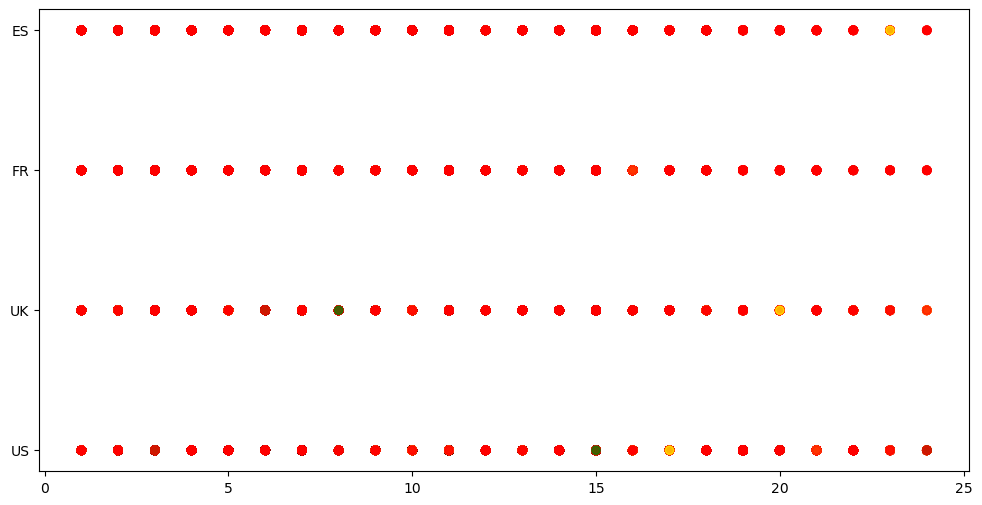

In [21]:
color_map= {
    'Unread':'red',
    'Mail opened':'yellow',
    'Link clicked':'green'
}
df['color']=df['Mail_status'].map(color_map)

plt.figure(figsize=(12,6))
plt.scatter(df['hour'],df['user_country'],c=df['color'],alpha=0.7)

    

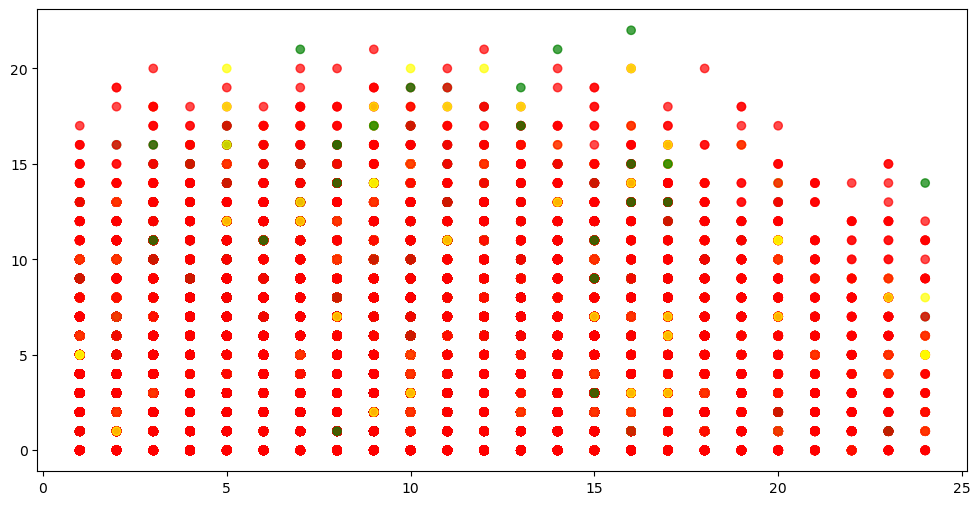

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

color_map= {
    'Unread':'red',
    'Mail opened':'yellow',
    'Link clicked':'green'
}
df['color']=df['Mail_status'].map(color_map)

plt.figure(figsize=(12,6))
plt.scatter(df['hour'],df['user_past_purchases'],c=df['color'],alpha=0.7)


In [43]:
count_df=df.groupby(['email_text','Mail_status']).size().reset_index(name='count')
pivot_df = count_df.pivot(index='email_text', columns='Mail_status', values='count').fillna(0)
print(pivot_df)

Mail_status  Link clicked  Mail opened  Unread
email_text                                    
long_email            932         3680   45664
short_email          1187         4596   43941


In [44]:
count_df=df.groupby(['email_version','Mail_status']).size().reset_index(name='count')
pivot_df = count_df.pivot(index='email_version', columns='Mail_status', values='count').fillna(0)
print(pivot_df)

Mail_status    Link clicked  Mail opened  Unread
email_version                                   
generic                 760         3255   46194
personalized           1359         5021   43411


In [ ]:
From the above result we can see people like personalised email more than generic email.

In [45]:
df_uk = df[df['user_country'] == 'UK']
pivot_table = df_uk.pivot_table(
    index='weekday',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
weekday                                       
Friday                 62          211    2601
Monday                 62          328    2474
Saturday               60          222    2655
Sunday                 66          229    2563
Thursday               73          301    2427
Tuesday                70          319    2471
Wednesday              99          305    2341


In [57]:
df_us = df[df['user_country'] == 'US']
pivot_table = df_us.pivot_table(
    index='weekday',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
weekday                                       
Friday                125          603    7817
Monday                231          894    7503
Saturday              183          726    7772
Sunday                161          722    7800
Thursday              252          939    7455
Tuesday               251          941    7236
Wednesday             261          894    7333


In [58]:
df_es = df[df['user_country'] == 'ES']
pivot_table = df_es.pivot_table(
    index='weekday',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
weekday                                       
Friday                  6           23    1342
Monday                 19           61    1391
Saturday                4           34    1440
Sunday                  6           40    1375
Thursday               11           49    1371
Tuesday                21           50    1331
Wednesday              16           53    1324


In [59]:
df_fr = df[df['user_country'] == 'FR']
pivot_table = df_fr.pivot_table(
    index='weekday',
    columns='Mail_status',
    aggfunc='size',
    fill_value=0        
)
print(pivot_table)

Mail_status  Link clicked  Mail opened  Unread
weekday                                       
Friday                  6           27    1354
Monday                 17           60    1323
Saturday               13           40    1420
Sunday                  8           42    1375
Thursday               13           56    1330
Tuesday                10           48    1395
Wednesday              13           59    1386


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
df=pd.read_csv(filepath)

In [63]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Mail_status')

In [64]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [65]:
target_encoder = LabelEncoder()
df['Mail_status'] = target_encoder.fit_transform(df['Mail_status'])

In [66]:
X = df.drop(columns=['Mail_status'])
y = df['Mail_status']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [75]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred = rf_model.predict(X_test)

In [77]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

Link clicked       1.00      1.00      1.00       424
 Mail opened       1.00      1.00      1.00      1655
      Unread       1.00      1.00      1.00     17921

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[  424     0     0]
 [    0  1655     0]
 [    0     0 17921]]
